In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Salary Data.csv')

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.dtypes

,0
YearsExperience,float64
Salary,float64


In [7]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


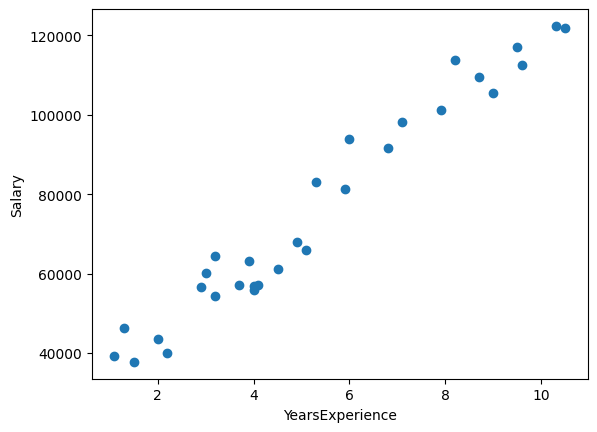

In [8]:
# linear relation between YearsExperience and Salary
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [9]:
import plotly.express as px
fig = px.scatter(df, x='YearsExperience', y='Salary', trendline='ols')
fig.show()
#

In [10]:
# correlation YearsExperience and Salary
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
x = df[['YearsExperience']]
y = df['Salary']

In [12]:
# simple linear regression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [13]:
model.score(x, y)

0.9569566641435086

In [14]:
x.min(), x.max()

(YearsExperience    1.1
 dtype: float64,
 YearsExperience    10.5
 dtype: float64)

In [15]:
# prediction the user input value
yearsexperience = int(input('enter the years of experience: '))

if yearsexperience > 1 and yearsexperience < 11:
  out = model.predict([[yearsexperience]])
  print(out)
else:
  print('enter the value between 1 to 11')

enter the years of experience: 2
[44692.12484158]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [16]:
# prediction on y values
y_pred = model.predict(x)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [17]:
# r2_score
r2_score(y, y_pred)

0.9569566641435086

In [19]:
result_pred = pd.DataFrame({'YearsExperience': x.YearsExperience,
                            'Salary': y_pred,
                            'Residuals': y-y_pred,
                            'E^2': (y-y_pred)**2})
result_pred

,YearsExperience,Salary,Residuals,E^2
0,1.1,36187.158752,3155.841248,9.959334e+06
1,1.3,38077.151217,8127.848783,6.606193e+07
2,1.5,39967.143681,-2236.143681,5.000339e+06
3,2.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,46582.117306,-6691.117306,4.477105e+07
5,2.9,53197.090931,3444.909069,1.186740e+07
6,3.0,54142.087163,6007.912837,3.609502e+07
7,3.2,56032.079627,-1587.079627,2.518822e+06
8,3.2,56032.079627,8412.920373,7.077723e+07
9,3.7,60757.060788,-3568.060788,1.273106e+07


In [21]:
result_pred['E^2'].sum()

938128551.6684289

In [24]:
import plotly.express as px
fig = px.box(df,x='YearsExperience')
fig.show()

In [25]:
px.box(df,df['Salary'])

In [26]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [27]:
import plotly.express as px
fig = px.scatter(result_pred, x='YearsExperience', y='Residuals')
fig.show()

<Axes: ylabel='Density'>

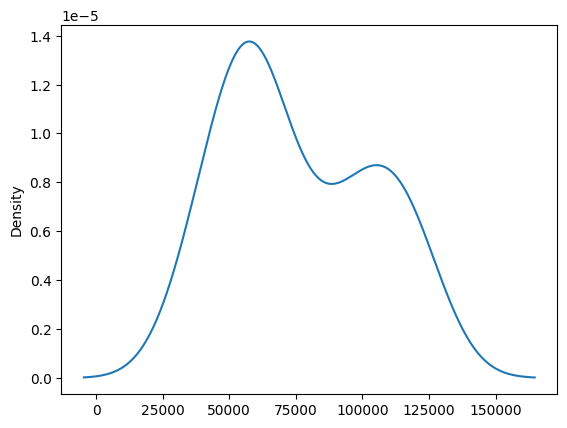

In [29]:
df['Salary'].plot(kind='kde')

In [31]:
import plotly.express as px
import plotly.graph_objects as go

# Create the KDE data using the graph_objects module
fig = go.Figure(data=[go.Histogram(x=df['Salary'], histnorm='density')])  # Using Histogram with density for KDE-like effect

# Add a KDE line using the graph_objects module
fig.add_trace(go.Scatter(x=df['Salary'], y=fig.data[0].y, mode='lines', name='KDE'))

# Customize the layout (optional)
fig.update_layout(title='KDE Plot of Salary', xaxis_title='Salary', yaxis_title='Density')

fig.show()